<a href="https://colab.research.google.com/github/mayankjamindaruk/Machine_Learning_Bootcamp/blob/master/USA_Cancer_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is created by Mayank for cancer prediction for Dphi Datathon, I am doing all the suggestions in version 2.

## Task 1

I intend to get all the libraries called up here


In [254]:
# the below code is for displaying the output from all lines of python code within a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# A fundamental package for linear algebra and multidimensional arrays
import pandas as pd                  

# Data analysis and data manipulating tool
import numpy as np                   

# Library to generate random numbers
import random                        

# Collection is a Python module that implements specialized container datatypes providing 
# Counter is a dict subclass for counting hashable objects
from collections import Counter      
                                     
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings in the notebook
import warnings
warnings.filterwarnings("ignore")

# to display up to 500 rows in the output of the jupyter notebook cell
pd.set_option('display.max_rows', 500)

Let's import the training data set and understand the data size


In [255]:
# import training data as pandas dataframe
# the data is in csv - comma separated file. Hence we use the function 'read_csv'

cancer_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv" )

# the below code will print the number of rows and columns
cancer_data.shape

(3051, 34)

Let's import the TESTING data set and understand the data size


In [256]:
cancer_test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Testing_set_label.csv')

cancer_test.shape

(762, 33)

## Task 2

Now, lets explore the data types of the input training data.

About data copied:
About the data
The data is collected from cancer.gov and the US Census American Community Survey. There are 34 columns including the target column. Some of the columns are listed below:

TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a)
avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)
avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)
incidenceRate: Mean per capita (100,000) cancer diagoses(a)
medianIncome: Median income per county (b)
popEst2015: Population of county (b)
povertyPercent: Percent of populace in poverty (b)
studyPerCap: Per capita number of cancer-related clinical trials per county (a)
binnedInc: Median income per capita binned by decile (b)
MedianAge: Median age of county residents (b)
MedianAgeMale: Median age of male county residents (b)
MedianAgeFemale: Median age of female county residents (b)
Geography: County name (b)
AvgHouseholdSize: Mean household size of county (b)
PercentMarried: Percent of county residents who are married (b)
PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school (b)
PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b)
PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)
PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)
PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma (b)
PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)
PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)
PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)
PctPrivateCoverage: Percent of county residents with private health coverage (b)
PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) (b)
PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)
PctPublicCoverage: Percent of county residents with government-provided health coverage (b)
PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)
PctWhite: Percent of county residents who identify as White (b)
PctBlack: Percent of county residents who identify as Black (b)
PctAsian: Percent of county residents who identify as Asian (b)
PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian (b)
PctMarriedHouseholds: Percent of married households (b)
BirthRate: Number of live births relative to number of women in county (b)
(a): years 2010-2016

(b): 2013 Census Estimates

In [257]:
cancer_data.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite                   float64
PctBlack            

Now, lets explore the data types of the input **TESTING** data.



In [258]:
cancer_test.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite                   float64
PctBlack            

In [259]:
cancer_test.shape

(762, 33)

Lets now check a few sample of data that how does it look for data exploration.


1.   There is a huge variance in the data values, 'avgDeathsPerYear' is single digit but MedIncome is 5 digits.
2.   Some of the values are zero eg 'studyPerCap'



In [260]:
cancer_data.head(10)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.000000,"(48021.6, 51046.4]",48.4,49.6,46.4,"Hettinger County, North Dakota",2.250,65.9,10.8,25.0,57.4,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.000000,"(54545.6, 61494.5]",41.9,41.3,43.2,"Mills County, Iowa",2.630,58.6,22.3,29.1,NaN,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.000000,"(37413.8, 40362.7]",48.9,47.9,49.9,"Gladwin County, Michigan",2.300,57.2,24.9,36.2,NaN,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.000000,"[22640, 34218.1]",44.2,42.7,45.2,"Fentress County, Tennessee",2.430,53.0,10.9,51.8,NaN,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.000000,"(37413.8, 40362.7]",45.0,42.2,48.0,"Las Animas County, Colorado",2.360,52.2,12.6,31.2,NaN,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2
5,49.0,24,437.7,27596,9122,32.5,0.000000,"[22640, 34218.1]",36.8,35.6,42.9,"Wilkinson County, Mississippi",2.600,34.4,28.5,40.8,NaN,7.3,36.1,10.0,39.0,9.7,42.3,32.7,27.9,48.2,32.0,28.871054,70.658106,0.000000,0.470840,36.054846,2.790179,219.7
6,44.0,14,506.7,55758,6309,11.3,0.000000,"(54545.6, 61494.5]",43.2,42.5,43.7,"Clay County, Nebraska",0.024,61.2,25.2,28.1,40.6,6.1,32.6,14.2,63.1,2.8,69.5,NaN,37.3,32.5,15.8,96.772172,0.454403,0.376058,0.893137,57.241116,8.012821,148.9
7,419.0,189,426.3,39922,82005,17.2,512.163892,"(37413.8, 40362.7]",40.5,39.4,41.9,"Cullman County, Alabama",2.550,57.6,20.6,30.6,44.7,4.1,34.7,9.1,49.7,7.3,62.6,47.9,42.1,35.3,19.0,95.693201,1.190638,0.557031,0.737356,54.850257,3.913309,187.9
8,929.0,355,507.3,42728,152692,18.0,438.791816,"(42724.4, 45201]",41.3,39.9,42.8,"Penobscot County, Maine",2.360,48.0,10.2,21.9,58.4,9.5,34.9,15.6,56.1,7.8,63.3,NaN,42.4,39.4,20.7,95.200636,0.825746,1.099474,0.158371,48.025753,4.133114,187.5
9,1081.0,367,490.9,53733,212284,15.7,249.665542,"(51046.4, 54545.6]",36.5,35.6,37.5,"Whatcom County, Washington",2.530,47.5,9.4,22.1,NaN,7.7,23.0,21.3,57.8,8.2,68.7,54.6,44.8,31.9,17.4,85.470304,0.880734,3.925157,2.425881,48.068750,4.472986,163.3


Checking if there are any missing values, we saw in the head there are definitely some.

In [261]:
cancer_data.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2266
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     604
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

In [262]:
cancer_test.isnull().sum()

avgAnnCount                  0
avgDeathsPerYear             0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
studyPerCap                  0
binnedInc                    0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
Geography                    0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctSomeCol18_24            580
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over          33
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    148
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarriedHouseholds         0
BirthRat

Exploratory Data Analysis - EDA

In [263]:
cancer_data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
count,3051.000000,3051.000000,3051.000000,3051.000000,3.051000e+03,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,785.000000,3051.000000,3051.000000,3051.000000,2899.000000,3051.000000,3051.000000,2447.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000
mean,570.668154,176.000983,449.007042,46902.917076,9.495799e+04,16.880367,158.695936,44.303540,39.600885,42.234579,2.473048,51.885480,18.225139,34.920190,41.247898,6.131957,34.909440,13.212750,54.115626,7.841069,64.519338,48.573314,41.342347,36.287545,19.198820,84.005243,9.166570,1.198561,1.864829,51.355837,5.608851,178.909767
std,1250.546532,445.042777,52.886386,11902.460659,2.761007e+05,6.340462,544.035590,38.704107,5.177629,5.253474,0.429926,6.812846,8.105799,9.021475,11.107006,4.552222,7.015728,5.360342,8.267656,3.454863,10.511932,10.011218,9.327793,7.748442,6.023164,16.126982,14.676772,2.369931,3.235204,6.524964,1.955201,27.570075
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,25.100000,0.000000,0.000000,7.100000,0.000000,7.500000,3.200000,17.600000,0.400000,23.400000,16.800000,14.300000,11.800000,2.600000,11.008762,0.000000,0.000000,0.000000,23.915652,0.000000,66.300000
25%,80.000000,29.000000,421.800000,38752.000000,1.236850e+04,12.200000,0.000000,37.900000,36.400000,39.200000,2.370000,47.800000,12.800000,29.300000,34.000000,3.100000,30.650000,9.300000,48.600000,5.500000,57.500000,41.300000,34.700000,31.000000,14.900000,78.012571,0.616576,0.261748,0.282825,47.736828,4.499936,161.400000
50%,171.000000,62.000000,453.549422,45098.000000,2.677700e+04,15.900000,0.000000,41.000000,39.500000,42.400000,2.500000,52.500000,17.200000,34.700000,41.000000,5.300000,35.400000,12.300000,54.400000,7.600000,65.300000,48.700000,41.300000,36.300000,18.800000,90.318790,2.276756,0.557031,0.791571,51.757925,5.384471,178.300000
75%,508.000000,148.000000,481.300000,52410.500000,6.853600e+04,20.400000,86.581336,43.900000,42.500000,45.300000,2.630000,56.500000,22.600000,40.700000,46.900000,8.100000,39.700000,16.100000,60.300000,9.700000,72.200000,55.700000,47.700000,41.400000,23.000000,95.577396,10.326954,1.189955,2.080241,55.465803,6.473896,195.500000
max,24965.000000,9445.000000,1206.900000,125635.000000,5.238216e+06,47.000000,9762.308998,525.600000,64.700000,65.700000,3.930000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,40.400000,76.500000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,84.866024,35.640183,38.743747,71.703057,21.326165,362.800000


So it shows three columns are missing lets analyze and strategy to handling.


1.   PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school (b): This is percentage so we can put a mean there.

2.   PctEmployed16_Over: Percent of county residents ages 16 and over employed (b). Same Strategy here

3. PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) (b). Same Strategy



In [264]:
cancer_data['PctSomeCol18_24'].fillna('41.247898', downcast='float64', inplace = True)
cancer_data['PctEmployed16_Over'].fillna(cancer_data['PctEmployed16_Over'].mean, downcast='float64', inplace = True)
cancer_data['PctPrivateCoverageAlone'].fillna(cancer_data['PctPrivateCoverageAlone'].mean, downcast='float', inplace = True)

cancer_test['PctSomeCol18_24'].fillna(cancer_test['PctSomeCol18_24'].mean, downcast='float', inplace = True)
cancer_test['PctEmployed16_Over'].fillna(cancer_test['PctEmployed16_Over'].mean, downcast='float', inplace = True)
cancer_test['PctPrivateCoverageAlone'].fillna(cancer_test['PctPrivateCoverageAlone'].mean, downcast='float', inplace = True)

In [265]:
cancer_data.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
TARGET_deathRate           0
dtype: int64

In [266]:
cancer_test.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [267]:
input = cancer_data.copy()
input.shape

(3051, 34)

In [268]:
#abc = cancer_data['binnedInc']

In [269]:
#for i in abc.index:
#    print(abc[i].split(',')[0].head()

Removing the object items

In [270]:
del input['binnedInc']
del input['Geography']

input.shape

(3051, 32)

In [271]:
del cancer_test['binnedInc']
del cancer_test['Geography']

cancer_test.shape

(762, 31)

In [272]:
input.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24             object
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over          object
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone     object
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite                   float64
PctBlack                   float64
PctAsian                   float64
PctOtherRace        

In [273]:
input = input.select_dtypes(include=[np.number]).fillna(0)
cancer_test = cancer_test.select_dtypes(include=[np.number]).fillna(0)

In [274]:
input.dtypes

avgAnnCount               float64
avgDeathsPerYear            int64
incidenceRate             float64
medIncome                   int64
popEst2015                  int64
povertyPercent            float64
studyPerCap               float64
MedianAge                 float64
MedianAgeMale             float64
MedianAgeFemale           float64
AvgHouseholdSize          float64
PercentMarried            float64
PctNoHS18_24              float64
PctHS18_24                float64
PctBachDeg18_24           float64
PctHS25_Over              float64
PctBachDeg25_Over         float64
PctUnemployed16_Over      float64
PctPrivateCoverage        float64
PctEmpPrivCoverage        float64
PctPublicCoverage         float64
PctPublicCoverageAlone    float64
PctWhite                  float64
PctBlack                  float64
PctAsian                  float64
PctOtherRace              float64
PctMarriedHouseholds      float64
BirthRate                 float64
TARGET_deathRate          float64
dtype: object

In [275]:
input.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,48.4,49.6,46.4,2.25,65.9,10.8,25.0,6.8,37.1,12.2,1.1,81.2,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,41.9,41.3,43.2,2.63,58.6,22.3,29.1,1.1,35.9,16.0,3.8,76.7,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,48.9,47.9,49.9,2.30,57.2,24.9,36.2,3.5,40.2,7.6,11.0,61.6,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,44.2,42.7,45.2,2.43,53.0,10.9,51.8,5.3,44.2,7.0,10.4,45.2,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,45.0,42.2,48.0,2.36,52.2,12.6,31.2,0.2,28.3,10.5,9.2,56.6,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


In [276]:
test_data.dtypes
test_data.head(5)

avgAnnCount               float64
avgDeathsPerYear            int64
incidenceRate             float64
medIncome                   int64
popEst2015                  int64
povertyPercent            float64
studyPerCap               float64
MedianAgeFemale           float64
AvgHouseholdSize          float64
PercentMarried            float64
PctNoHS18_24              float64
PctHS18_24                float64
PctBachDeg18_24           float64
PctHS25_Over              float64
PctBachDeg25_Over         float64
PctUnemployed16_Over      float64
PctPrivateCoverage        float64
PctEmpPrivCoverage        float64
PctPublicCoverage         float64
PctPublicCoverageAlone    float64
PctWhite                  float64
PctBlack                  float64
PctAsian                  float64
PctOtherRace              float64
PctMarriedHouseholds      float64
BirthRate                 float64
dtype: object

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,2092.000000,763,341.000000,34368,842304,33.5,42.739913,30.1,3.62,51.0,22.3,29.0,5.1,23.2,11.9,9.9,32.6,22.9,37.3,28.2,91.409724,0.620104,1.041848,5.804689,56.335344,6.825886
1,94.000000,41,445.200000,35615,16704,21.5,0.000000,42.1,2.68,52.0,9.8,36.1,8.3,47.1,7.9,9.0,55.6,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861
2,126.000000,43,425.700000,76672,32154,7.6,31.100330,36.0,2.44,55.8,13.0,26.8,10.0,30.5,17.5,2.8,83.3,55.9,19.6,5.9,92.626100,1.114294,1.257510,1.844348,52.614465,10.502567
3,1962.667684,16,453.549422,45856,5428,11.4,0.000000,45.5,2.29,60.5,33.2,13.9,7.6,35.3,15.5,4.3,75.8,44.5,33.4,15.5,96.855117,0.381749,0.181785,0.163607,55.044700,9.342231
4,1962.667684,4,453.549422,53739,1670,10.9,0.000000,44.4,2.07,55.9,25.2,31.1,3.0,29.7,15.5,2.4,78.2,48.6,29.2,11.2,98.327360,0.358423,0.000000,0.000000,47.826087,10.029499


### Feature Selection

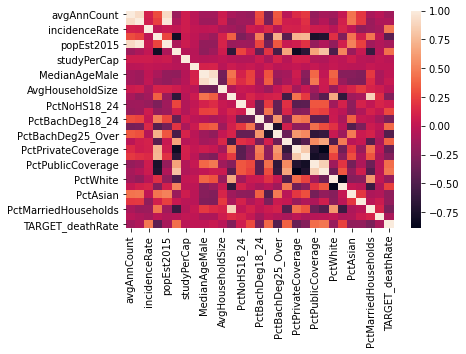

In [277]:
import seaborn as sns

input_corr_matrix = input.corr()
sns.heatmap(data=input_corr_matrix, annot=False)

In [278]:
#printing all the correlations in descending order
input_corr_matrix['TARGET_deathRate'].sort_values(ascending=False)

TARGET_deathRate          1.000000
incidenceRate             0.467683
PctPublicCoverageAlone    0.456804
povertyPercent            0.427118
PctPublicCoverage         0.422291
PctHS25_Over              0.403449
PctUnemployed16_Over      0.379085
PctHS18_24                0.284328
PctBlack                  0.250954
PctNoHS18_24              0.075815
MedianAgeFemale           0.034693
MedianAge                 0.002772
MedianAgeMale            -0.002006
studyPerCap              -0.023890
AvgHouseholdSize         -0.030288
avgDeathsPerYear         -0.074008
BirthRate                -0.088322
popEst2015               -0.111470
avgAnnCount              -0.130745
PctWhite                 -0.173265
PctOtherRace             -0.189210
PctAsian                 -0.202352
PctEmpPrivCoverage       -0.257117
PercentMarried           -0.262946
PctBachDeg18_24          -0.292220
PctMarriedHouseholds     -0.298414
PctPrivateCoverage       -0.382859
medIncome                -0.433311
PctBachDeg25_Over   

Below I am trying my code to break the objects, I have some idea but not fully functional now.

In [279]:
#from sklearn.feature_selection import VarianceThreshold

#var = VarianceThreshold()

# Perform variance thresholding
#var.fit_transform(input)

# Print the name and variance of each feature
#for feature in zip(input.columns, var.variances_):
#    print(feature)

I am creating a copy of the input data so that I can do different feature selections

In [280]:
inputCopy1 = input.copy()
inputCopy1.shape

(3051, 29)

In [281]:
# This is least contributing due to mimimum variance so dropping AvgHouseholdSize

del input['MedianAge']

In [282]:
del input['MedianAgeMale']

In [283]:

del cancer_test['MedianAge']
del cancer_test['MedianAgeMale']

In [284]:
from sklearn import model_selection

#create train and test split
input_train, input_test = model_selection.train_test_split(input,test_size=0.2,random_state=1)
print("Shape of the original input data: ", input.shape)
print("Shape of the input train data = ", input_train.shape)
print("Shape of the input test data = ", input_test.shape)

#Resetting index for prediction time
input_train = input_train.reset_index(drop=True)
input_test = input_test.reset_index(drop=True)

Shape of the original input data:  (3051, 27)
Shape of the input train data =  (2440, 27)
Shape of the input test data =  (611, 27)


Now I will do feature selection for anothe copy, here I will just take top contributing ones ie more than 0.4 contribution/impact


In [285]:
inputCopy1.shape

del inputCopy1['PctUnemployed16_Over']
del inputCopy1['PctHS18_24']
del inputCopy1['PctBlack']
del inputCopy1['PctNoHS18_24']
del inputCopy1['MedianAgeFemale']
del inputCopy1['MedianAgeMale']
del inputCopy1['studyPerCap']
del inputCopy1['AvgHouseholdSize']
del inputCopy1['avgDeathsPerYear']
del inputCopy1['BirthRate']
del inputCopy1['popEst2015']
del inputCopy1['avgAnnCount']
del inputCopy1['PctWhite']
del inputCopy1['PctOtherRace']
del inputCopy1['PctAsian']
del inputCopy1['PctEmpPrivCoverage']
del inputCopy1['PercentMarried']
del inputCopy1['PctBachDeg18_24']
del inputCopy1['PctMarriedHouseholds']
del inputCopy1['PctPrivateCoverage']
del inputCopy1['MedianAge']

inputCopy1.shape

(3051, 29)

(3051, 8)

In [286]:
inputCopy1.head()

,incidenceRate,medIncome,povertyPercent,PctHS25_Over,PctBachDeg25_Over,PctPublicCoverage,PctPublicCoverageAlone,TARGET_deathRate
0,481.5,50038,11.1,37.1,12.2,34.7,9.9,160.3
1,486.0,59399,9.7,35.9,16.0,32.1,12.8,194.9
2,475.7,39721,18.5,40.2,7.6,49.8,21.6,196.5
3,496.6,30299,28.1,44.2,7.0,53.2,33.0,230.9
4,372.0,39625,17.4,28.3,10.5,43.0,24.7,162.2


Seperating Labels and attributes

In [287]:
from sklearn import model_selection

#create train and test split
inputCopy1_train, inputCopy1_test = model_selection.train_test_split(inputCopy1,test_size=0.2,random_state=1)
print("Shape of the original inputCopy1 data: ", inputCopy1.shape)
print("Shape of the inputCopy1 train data = ", inputCopy1_train.shape)
print("Shape of the inputCopy1 test data = ", inputCopy1_test.shape)

#Resetting index for prediction time
inputCopy1_train = inputCopy1_train.reset_index(drop=True)
inputCopy1_test = inputCopy1_test.reset_index(drop=True)


Shape of the original inputCopy1 data:  (3051, 8)
Shape of the inputCopy1 train data =  (2440, 8)
Shape of the inputCopy1 test data =  (611, 8)


## Task 3

### Build any Machine Learning Model of your choice

Seperating the features and Label for model building.

In [288]:
input_train_label = input_train['TARGET_deathRate']
input_train_label.shape
input_train_label.head(7)

(2440,)

0    156.0
1    169.7
2    194.4
3    161.2
4    189.8
5    176.3
6    200.2
Name: TARGET_deathRate, dtype: float64

In [289]:
input_train_features = input_train.copy()
input_train_features.shape
del input_train_features['TARGET_deathRate']
input_train_features.shape

(2440, 27)

(2440, 26)

Now doing for the other attribute data selection

In [290]:
inputCopy1_train_label = inputCopy1_train['TARGET_deathRate']
inputCopy1_train_features = inputCopy1_train.copy()
inputCopy1_train_features.shape
del inputCopy1_train_features['TARGET_deathRate']
inputCopy1_train_features.shape

(2440, 8)

(2440, 7)

In [291]:

inputCopy1_test_label = inputCopy1_test['TARGET_deathRate']
inputCopy1_test_features = inputCopy1_test.copy()
inputCopy1_test_features.shape
del inputCopy1_test_features['TARGET_deathRate']
inputCopy1_test_features.shape

(611, 8)

(611, 7)

### Evaluate your model with various Evaluation Metrics

In [292]:

from sklearn.linear_model import LinearRegression

# create the model object
lr = LinearRegression()

# fit the model on train data
lr.fit(input_train_features, input_train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [293]:
input_test_label = input_test['TARGET_deathRate']
input_test_label.shape
input_test_label.head(7)


input_test_features = input_test.copy()
print('Printing shapes')
input_test_features.shape

del input_test_features['TARGET_deathRate']
input_test_features.shape

(611,)

0    148.9
1    129.3
2    153.6
3    235.8
4    194.8
5    186.8
6    176.6
Name: TARGET_deathRate, dtype: float64

Printing shapes


(611, 27)

(611, 26)

In [294]:
#Predictions on the Test data
predictions_lr = lr.predict(input_test_features)

#Putting the above predictions and probabilities together to create a readable df
lr_df = pd.DataFrame(predictions_lr.reshape(len(predictions_lr),1))
lr_df.rename(columns={0:'prediction'}, inplace=True)
lr_df.head(5)

,prediction
0,174.208833
1,141.332317
2,161.091438
3,228.578123
4,192.698420


Now performing same model and prediction for other data set

In [295]:
# create the model object
lrCopy = LinearRegression()

# fit the model on train data
lrCopy.fit(inputCopy1_train_features, inputCopy1_train_label)

#Predictions on the Test data
predictions_lrCopy = lrCopy.predict(inputCopy1_test_features)

#Putting the above predictions and probabilities together to create a readable df
lr_dfCopy = pd.DataFrame(predictions_lrCopy.reshape(len(predictions_lrCopy),1))
lr_dfCopy.rename(columns={0:'prediction'}, inplace=True)
lr_dfCopy.head(5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

,prediction
0,183.126327
1,142.446331
2,164.447928
3,221.215700
4,192.041941


## Task 4


### Evaluate your model 

In [296]:
# import metrics library
from sklearn import metrics

#print result of MSE
print(metrics.mean_squared_error(input_test['TARGET_deathRate'], lr_df['prediction']))


346.79761074179913


Now evaluating the other model

## Task 5

### Use any Feature Selection Technique and observe if the model created by selected features performs better than the previous model

In [297]:
#print result of MSE
print(metrics.mean_squared_error(inputCopy1_test['TARGET_deathRate'], lr_dfCopy['prediction']))

383.3447780440351


In [298]:
cancer_test.shape
cancer_test.head(5)
cancer_test.dtypes

(762, 26)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,2092.000000,763,341.000000,34368,842304,33.5,42.739913,30.1,3.62,51.0,22.3,29.0,5.1,23.2,11.9,9.9,32.6,22.9,37.3,28.2,91.409724,0.620104,1.041848,5.804689,56.335344,6.825886
1,94.000000,41,445.200000,35615,16704,21.5,0.000000,42.1,2.68,52.0,9.8,36.1,8.3,47.1,7.9,9.0,55.6,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861
2,126.000000,43,425.700000,76672,32154,7.6,31.100330,36.0,2.44,55.8,13.0,26.8,10.0,30.5,17.5,2.8,83.3,55.9,19.6,5.9,92.626100,1.114294,1.257510,1.844348,52.614465,10.502567
3,1962.667684,16,453.549422,45856,5428,11.4,0.000000,45.5,2.29,60.5,33.2,13.9,7.6,35.3,15.5,4.3,75.8,44.5,33.4,15.5,96.855117,0.381749,0.181785,0.163607,55.044700,9.342231
4,1962.667684,4,453.549422,53739,1670,10.9,0.000000,44.4,2.07,55.9,25.2,31.1,3.0,29.7,15.5,2.4,78.2,48.6,29.2,11.2,98.327360,0.358423,0.000000,0.000000,47.826087,10.029499


avgAnnCount               float64
avgDeathsPerYear            int64
incidenceRate             float64
medIncome                   int64
popEst2015                  int64
povertyPercent            float64
studyPerCap               float64
MedianAgeFemale           float64
AvgHouseholdSize          float64
PercentMarried            float64
PctNoHS18_24              float64
PctHS18_24                float64
PctBachDeg18_24           float64
PctHS25_Over              float64
PctBachDeg25_Over         float64
PctUnemployed16_Over      float64
PctPrivateCoverage        float64
PctEmpPrivCoverage        float64
PctPublicCoverage         float64
PctPublicCoverageAlone    float64
PctWhite                  float64
PctBlack                  float64
PctAsian                  float64
PctOtherRace              float64
PctMarriedHouseholds      float64
BirthRate                 float64
dtype: object

The previous model was better, so we will go with that not the less features one.
Lets do the prediction now:

Predicting the output with the best model

In [299]:
input_test_features.shape
#Predictions on the Test data
predictions_lr_final = lr.predict(cancer_test)

#Putting the above predictions and probabilities together to create a readable df
lr_df_final = pd.DataFrame(predictions_lr_final.reshape(len(predictions_lr_final),1))
lr_df_final.rename(columns={0:'prediction'}, inplace=True)
lr_df_final.head(5)
lr_df_final.shape

(611, 26)

,prediction
0,159.381107
1,194.391532
2,155.251448
3,154.618633
4,160.694349


(762, 1)

In [300]:
import numpy



numpy.savetxt("PrectedCancerLables_14012021.csv", lr_df_final, delimiter=",")